## Predicting Location Based on Acropora Diversity and Abundance

In this notebook I download data of _Acropora_ occurrences in Australia from GBIF using `records`. I then train a clustering algorithm in `sklearn` to identify country of origin based on _Acropora_ diversity and abundance. This did not work well due to the surprisingly small sample sizes on GBIF. I also don't know the __type__ of data that is being pulled from GBIF. If the researchers that put the data on GBIF were searching for a certain species one year and doing a transect another year, the samples will not be reflective of the diversity and abundance of the system as a whole and training will not work. In essence, if there was more and better quality data, the training would likely work but in the case of this data, it was ineffective.

In [1]:
import records
import sklearn
import pandas as pd
import seaborn as sns

#### Here we download all entries for _Acropora_ in Australia from 1960 (because data collection was quite poor early on) until the present and place them into 5 year epochs:

In [2]:
AU = records.Epochs("Acropora", 1960, 2018, 5, **{"country": "AU"})

#### Making sure all entries found by the class object are actually _Acropora_:

In [3]:
AU1 = AU.sdf
AU2 = AU1[AU1["species"].str.contains("Acropora") == True]

#### Removing the columns for year and country:

In [4]:
sub = AU2.drop(AU2.columns[[1,3]], axis=1)
sub.head(10)

,species,epoch,stateProvince
0,Acropora latistella,1960,NaN
1,Acropora hyacinthus,1960,NaN
2,Acropora latistella,1960,NaN
3,Acropora muricata,1960,NaN
13,Acropora muricata,1960,Queensland
17,Acropora millepora,1960,NaN
18,Acropora microphthalma,1960,NaN
21,Acropora glauca,1960,New South Wales
22,Acropora hyacinthus,1960,NaN
25,Acropora humilis,1960,Northern Territory


#### Pivoting the table, counting, and reindexing such that each species gets its own column and own count:

In [5]:
tally = sub.pivot_table(index=('stateProvince', 'epoch'), columns=('species'), aggfunc='size', fill_value=0)
reset2 = tally.reset_index(drop=False)
reset2.head(10)

species,stateProvince,epoch,Acropora abrolhosensis,Acropora abrotanoides,Acropora aculeus,Acropora acuminata,Acropora anthocercis,Acropora arafura,Acropora aspera,Acropora austera,...,Acropora tenuis,Acropora torihalimeda,Acropora tortuosa,Acropora turaki,Acropora valenciennesi,Acropora valida,Acropora vaughani,Acropora verweyi,Acropora willisae,Acropora yongei
0,New South Wales,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,New South Wales,1980,0,10,0,1,0,0,1,6,...,0,0,18,0,0,29,0,0,0,16
2,New South Wales,1985,0,0,0,2,0,0,1,0,...,0,0,11,0,0,0,0,0,0,0
3,New South Wales,1990,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,New South Wales,1995,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,New South Wales,2000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,0,0,0,0
6,New South Wales,2005,0,18,0,0,1,0,0,1,...,2,0,5,0,0,8,0,0,0,8
7,New South Wales,2010,0,1,0,0,0,0,0,0,...,1,0,0,0,0,3,0,2,0,0
8,Northern Territory,1960,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,2,0,0
9,Northern Territory,1965,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,2,0,0


#### Here we correct the abbreviated states to match the rest of the entries:

In [6]:
reset2['stateProvince'] = reset2['stateProvince'].replace(['Wa'], 'Western Australia').replace(['Qld'], 'Queensland').replace(['Nt'], 'Northern Territory')
reset2.head(10)

species,stateProvince,epoch,Acropora abrolhosensis,Acropora abrotanoides,Acropora aculeus,Acropora acuminata,Acropora anthocercis,Acropora arafura,Acropora aspera,Acropora austera,...,Acropora tenuis,Acropora torihalimeda,Acropora tortuosa,Acropora turaki,Acropora valenciennesi,Acropora valida,Acropora vaughani,Acropora verweyi,Acropora willisae,Acropora yongei
0,New South Wales,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,New South Wales,1980,0,10,0,1,0,0,1,6,...,0,0,18,0,0,29,0,0,0,16
2,New South Wales,1985,0,0,0,2,0,0,1,0,...,0,0,11,0,0,0,0,0,0,0
3,New South Wales,1990,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,New South Wales,1995,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,New South Wales,2000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,0,0,0,0
6,New South Wales,2005,0,18,0,0,1,0,0,1,...,2,0,5,0,0,8,0,0,0,8
7,New South Wales,2010,0,1,0,0,0,0,0,0,...,1,0,0,0,0,3,0,2,0,0
8,Northern Territory,1960,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,2,0,0
9,Northern Territory,1965,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,2,0,0


#### Designating the feature matrix (x values):

In [7]:
X_cor = reset2.drop("stateProvince", axis = 1)
X_cor.shape

(41, 85)

#### Designating the target vector (y values). In this case it is the `stateProvince` value:

In [8]:
y_cor = reset2["stateProvince"]
y_cor.shape

(41,)

#### Breaking up the dataset into training and testing sets using `train_test_split`

In [22]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_cor, y_cor, random_state=1)

#### Here I use the `GaussianMixture` class from `sklearn.mixture` as the machine learning method. I'm not sure if it's actually necessary to use a training subset if you're doing a clustering analysis because the reading didn't use the training subset but I just did it here when running `model.fit()`. I could not use `Xtest` for `model.predict()` because it gave me an error with the length of the dataset and I didn't know how to correct for that:

In [43]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 4,
            covariance_type='full')
model.fit(Xtrain)
y_gaus=model.predict(X_cor)

#### Plotting the clusters using `lmplot`:

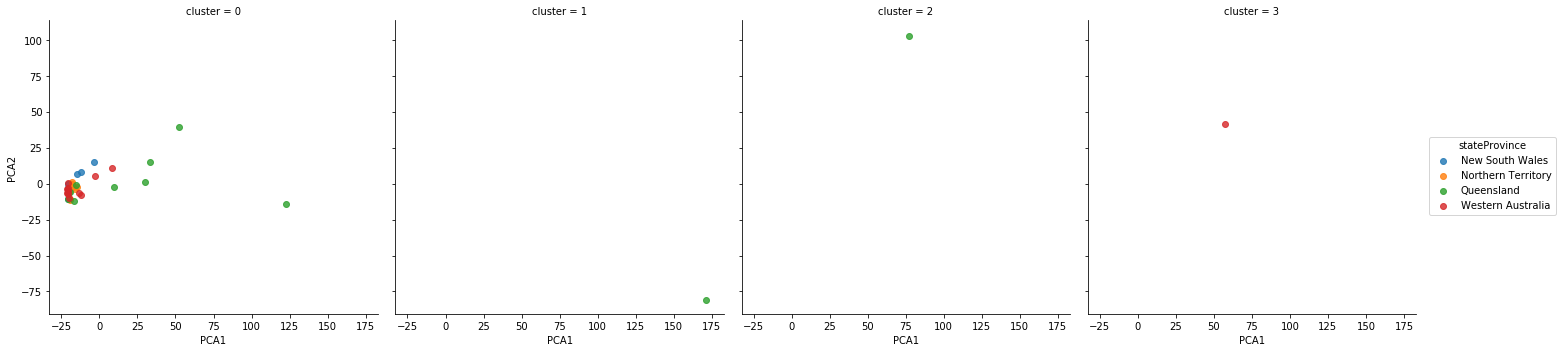

In [44]:
reset2['cluster'] = y_gaus
sns.lmplot("PCA1", "PCA2", data=reset2, hue="stateProvince",
          col='cluster', fit_reg=False);

In the case of this clustering analysis, I couldn't find in the reading if there's actually a way to measure the accuracy of the model so the vii. part of my assignment can't be completed. I expand on difficulties with this clustering analysis here though:

#### As we can see from the clustering analysis (and as I mentioned at the beginning of this notebook), the sample size is a bit too small and data quality a bit too inconsistent for the algorithm to be able to identify state based on the _Acropora_ community and abundance data. Based on what we know about species distributions of _Acropora_ species between the Indian and Pacific Oceans, we would expect for there to be some groupings but there are none in the data. More consistently high quality data would likely yield groupings with some overlap as we move west to east from Western Australia, Northern Territory, Queensland, and finally to New South Wales.